In [44]:
import torch
import torch.nn as nn

In [45]:
class Perceptron(nn.Module):
    """ A perseptron is one linear layer """
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        return torch.sigmoid(self.fc1(x_in)).squeeze()

In [55]:
percp = Perceptron(2)

In [57]:
for p in percp.parameters():
    print(p)

Parameter containing:
tensor([[ 0.1840, -0.2264]], requires_grad=True)
Parameter containing:
tensor([-0.2551], requires_grad=True)


In [59]:
percp

Perceptron(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

In [8]:
x = torch.rand(2, 2)

In [9]:
x

tensor([[0.6343, 0.5609],
        [0.8892, 0.8856]])

## Activation functions

In [10]:
import matplotlib.pyplot as plt

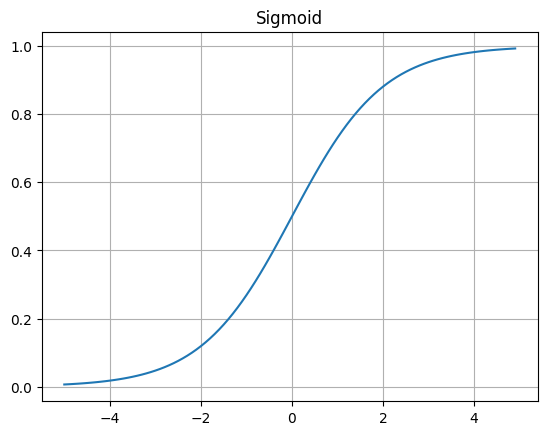

In [24]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)

plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.title("Sigmoid")
plt.show()

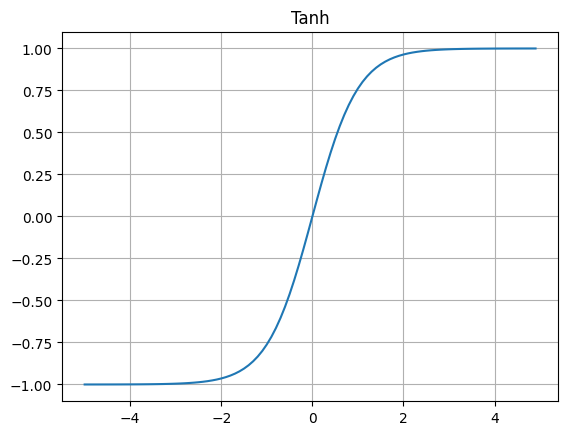

In [25]:
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.title("Tanh")
plt.show()

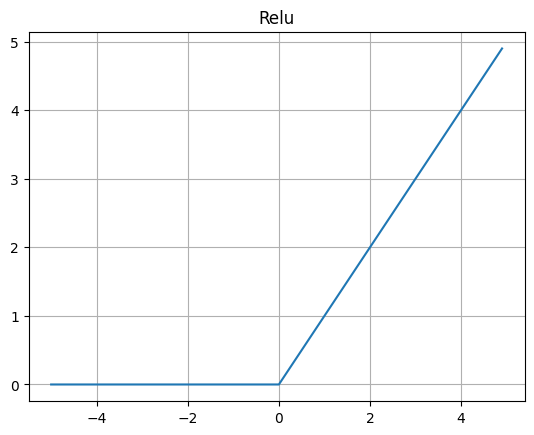

In [26]:
relu = torch.nn.ReLU()
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.grid()
plt.title("Relu")
plt.show()

In [27]:
softmax = nn.Softmax(dim =1)
x_input = torch.rand(1,3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[0.8447, 0.6227, 0.3741]])
tensor([[0.4123, 0.3302, 0.2575]])
tensor([1.0000])


## Loss

In [33]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3,5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.4327, grad_fn=<MseLossBackward0>)


In [39]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)

print(outputs)
print(targets)
print(loss)

tensor([[-0.0028, -0.8956,  0.7079,  2.2553,  0.9260],
        [-2.0101, -2.4024, -2.0157, -0.6454,  1.8848],
        [ 1.0498, -0.4649,  1.4326, -0.1099, -0.4268]], requires_grad=True)
tensor([1, 0, 3])
tensor(3.3295, grad_fn=<NllLossBackward0>)


In [43]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

x = torch.randn(4, 1, requires_grad=True)
probabilities = sigmoid(x)
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)

print(x)
print(probabilities)
print(targets)
print(loss)

tensor([[ 0.4834],
        [-2.3545],
        [ 1.0784],
        [-1.0235]], requires_grad=True)
tensor([[0.6186],
        [0.0867],
        [0.7462],
        [0.2643]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [0.],
        [1.],
        [0.]])
tensor(0.2927, grad_fn=<BinaryCrossEntropyBackward0>)
